# Basic Model

In [1]:
import sumProduct as sp
import numpy as np
import graphviz as gp
import matplotlib.pyplot as plt
import subprocess

In [2]:
prior=sp.freeEnergyFactorNode()
var=sp.variableNode(name='var',vrange=['pain','nopain'])
prior.addNeighbour(var)

In [3]:
def exprior(condrv,conditioners):
    if condrv[0] is None:
        return 100.0
    if condrv[0]=='nopain':
        return 0.8
    if condrv[0]=='pain':
        return 0.2
    
prior.setPrior(exprior)
prior.predictFactor()
allNodes=[var,prior]

In [4]:
outf=open("Basic.dot","w")
outf.write(prior.dotPrint())
outf.close()
subprocess.call("neato -T png -o Basic.png Basic.dot", shell=True)

1

<img src="files/Basic.png">

In [5]:
prior.pseudoCounts
marginals=[]

In [6]:
ppain=[]
pnopain=[]
Pseudocounts=[]
for trial in range(30):
    sp.startLearning(allNodes)
    var.observe('nopain')
    sp.runSumProduct(allNodes)
    ppain.append(prior.naturalParams[(('pain',),(None,))])
    pnopain.append(prior.naturalParams[(('nopain',),(None,))])
    marginals.append(var.marginal()[-1])
    Pseudocounts.append(prior.pseudoCounts)
    sp.accumulateEvidence(allNodes)
    sp.learn(allNodes) 
for trial in range(30):
    sp.startLearning(allNodes)
    var.observe('pain')
    sp.runSumProduct(allNodes)
    print(prior.pseudoCounts)
    ppain.append(prior.naturalParams[(('pain',),(None,))])
    pnopain.append(prior.naturalParams[(('nopain',),(None,))])
    marginals.append(var.marginal()[-1])
    Pseudocounts.append(prior.pseudoCounts)
    sp.accumulateEvidence(allNodes)
    sp.learn(allNodes)

starting learning for 2 nodes
Runing Sum-product
accumulating evidence for 2 nodes
learning for 2 nodes
starting learning for 2 nodes
Runing Sum-product
accumulating evidence for 2 nodes
learning for 2 nodes
starting learning for 2 nodes
Runing Sum-product
accumulating evidence for 2 nodes
learning for 2 nodes
starting learning for 2 nodes
Runing Sum-product
accumulating evidence for 2 nodes
learning for 2 nodes
starting learning for 2 nodes
Runing Sum-product
accumulating evidence for 2 nodes
learning for 2 nodes
starting learning for 2 nodes
Runing Sum-product
accumulating evidence for 2 nodes
learning for 2 nodes
starting learning for 2 nodes
Runing Sum-product
accumulating evidence for 2 nodes
learning for 2 nodes
starting learning for 2 nodes
Runing Sum-product
accumulating evidence for 2 nodes
learning for 2 nodes
starting learning for 2 nodes
Runing Sum-product
accumulating evidence for 2 nodes
learning for 2 nodes
starting learning for 2 nodes
Runing Sum-product
accumulating ev

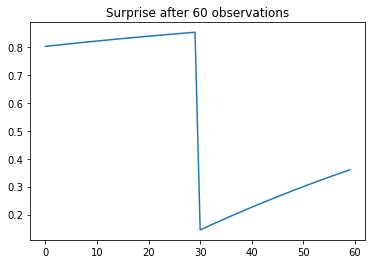

In [8]:
plt.plot(marginals)
plt.title('Surprise after 60 observations')
plt.show()

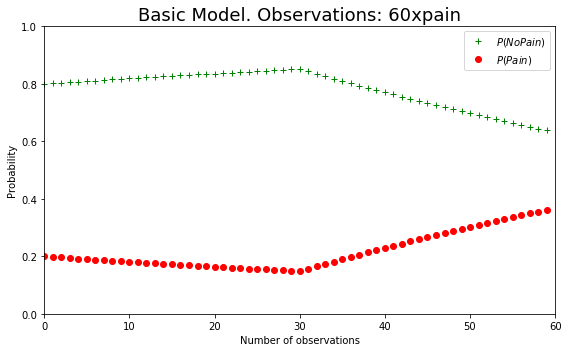

In [9]:
plt.figure(figsize=(8.0,5.0))
plt.title("Basic Model. Observations: 60xpain", fontsize=18)
plt.xlabel('Number of observations')
plt.ylabel('Probability')
axes = plt.gca()
axes.set_xlim([0,60])
axes.set_ylim([0,1])
plt.plot(pnopain, 'g+', label='$P(No Pain)$')
plt.plot(ppain, 'ro', label='$P(Pain)$')
plt.legend()
#plt.savefig("SimpleModel_Prior-Nu=10-LambdaPain=0.1.png")
plt.tight_layout()
plt.show()